In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, QuantileTransformer, PowerTransformer,RobustScaler,MinMaxScaler

import scipy.stats as stats
import math as m

import warnings
warnings.filterwarnings("ignore")

import acquire as a
import prepare as p

In [2]:
df = a.get_zillow_data()

In [3]:
df.shape

(33701, 62)

In [4]:
df.describe()

,parcelid,logerror,id,parcelid,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,...,unitcnt,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock
count,3.370100e+04,33701.000000,3.370100e+04,3.370100e+04,11545.0,33701.000000,33701.000000,33574.000000,33701.000000,33701.000000,...,33701.0,33694.000000,7.000000,3.364100e+04,3.370100e+04,33701.0,3.370100e+04,33697.000000,1727.000000,3.364000e+04
mean,1.192514e+07,0.015062,1.500553e+06,1.192514e+07,1.0,2.196611,3.206403,6.269524,2.196611,1818.799472,...,1.0,1957.360628,1.428571,1.859574e+05,4.988419e+05,2016.0,3.132156e+05,6297.476117,14.109438,6.038719e+13
std,3.026883e+06,0.168529,8.592229e+05,3.026883e+06,0.0,1.051849,0.934569,1.714899,1.051849,987.810367,...,0.0,23.027131,0.786796,2.688687e+05,7.841555e+05,0.0,5.755294e+05,9234.633765,2.540097,2.304408e+12
min,1.071186e+07,-4.655420,1.433000e+03,1.071186e+07,1.0,1.000000,1.000000,1.000000,1.000000,504.000000,...,1.0,1878.000000,1.000000,1.480000e+02,1.000000e+03,2016.0,1.610000e+02,120.840000,4.000000,6.037101e+13
25%,1.120588e+07,-0.029372,7.663920e+05,1.120588e+07,1.0,2.000000,3.000000,5.000000,2.000000,1204.000000,...,1.0,1946.000000,1.000000,7.340200e+04,1.651660e+05,2016.0,5.666200e+04,2414.580000,14.000000,6.037235e+13
50%,1.188123e+07,0.006140,1.500939e+06,1.188123e+07,1.0,2.000000,3.000000,6.000000,2.000000,1560.000000,...,1.0,1954.000000,1.000000,1.232670e+05,3.237600e+05,2016.0,1.840140e+05,4280.370000,15.000000,6.037432e+13
75%,1.250052e+07,0.042124,2.245791e+06,1.250052e+07,1.0,3.000000,4.000000,8.000000,3.000000,2143.000000,...,1.0,1969.000000,1.500000,2.050000e+05,5.529570e+05,2016.0,3.629510e+05,6944.040000,15.000000,6.037600e+13
max,1.676392e+08,5.262999,2.982167e+06,1.676392e+08,1.0,13.000000,11.000000,12.000000,13.000000,21929.000000,...,1.0,2016.000000,3.000000,9.164901e+06,2.538125e+07,2016.0,2.233550e+07,290998.060000,99.000000,4.830301e+14


In [5]:
df.columns

Index(['parcelid', 'logerror', 'transactiondate', 'id', 'parcelid',
       'airconditioningtypeid', 'architecturalstyletypeid', 'basementsqft',
       'bathroomcnt', 'bedroomcnt', 'buildingclasstypeid',
       'buildingqualitytypeid', 'calculatedbathnbr', 'decktypeid',
       'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15',
       'finishedsquarefeet50', 'finishedsquarefeet6', 'fips', 'fireplacecnt',
       'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'hashottuborspa',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertylandusetypeid',
       'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'storytypeid', 'threequarterbathnbr', 'typeconstructiontypei

In [6]:
df = df[['bathroomcnt', 'calculatedfinishedsquarefeet', 'taxvaluedollarcnt']]

In [7]:
df.head()

,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt
0,3.0,2376.0,145143.0
1,3.0,2962.0,773303.0
2,1.0,738.0,218552.0
3,3.0,3039.0,220583.0
4,3.0,2540.0,430108.0


In [8]:
df = df.dropna()

In [9]:
df.isna().sum()

bathroomcnt                     0
calculatedfinishedsquarefeet    0
taxvaluedollarcnt               0
dtype: int64

In [10]:
df.head()

,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt
0,3.0,2376.0,145143.0
1,3.0,2962.0,773303.0
2,1.0,738.0,218552.0
3,3.0,3039.0,220583.0
4,3.0,2540.0,430108.0


In [11]:
def get_outliers_iqr(df, col):
    
    q75, q25 = np.percentile(df[col], [75,25])
    upper_bound = 3*stats.iqr(df[col]) + q75
    lower_bound = q25 - 3*stats.iqr(df[col])
        
    return upper_bound, lower_bound

In [12]:
for col in df.columns:
    
    tup = get_outliers_iqr(df, col)
    print(f"{col}: {tup} ")

bathroomcnt: (6.0, -1.0) 
calculatedfinishedsquarefeet: (4960.0, -1613.0) 
taxvaluedollarcnt: (1716330.0, -998207.0) 


In [13]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        q75, q25 = np.percentile(df[col], [75,25])
        ub = 3*stats.iqr(df[col]) + q75
        lb = q25 - 3*stats.iqr(df[col])
        df = df[df[col] <= ub]
        df = df[df[col] >= lb]
    return df

In [14]:
df = remove_outliers_iqr(df, df.columns)

In [15]:
df.shape

(32180, 3)

In [16]:
train, test = p.split_my_data(df, train_ratio = .80, seed = 123)

# Unscaled

In [17]:
# split into X and y
X_train = train[['bathroomcnt', 'calculatedfinishedsquarefeet']]
y_train = train[['taxvaluedollarcnt']]

X_test = test[['bathroomcnt', 'calculatedfinishedsquarefeet']]
y_test = test[['taxvaluedollarcnt']]

# get baseline value for X and y
mean_tax_value = int(y_train['taxvaluedollarcnt'].mean(axis=0))
y_test[['yhat']] = mean_tax_value

mse_base = mean_squared_error(y_test.taxvaluedollarcnt, y_test.yhat)
baseline_rmse = m.sqrt(mse_base)

print(f"Baseline RMSE: {baseline_rmse}\n")

# create/fit regression model on unscaled data
lr = LinearRegression()

lr.fit(X_train,y_train.taxvaluedollarcnt)

# get predictions
y_test['predictions'] = lr.predict(X_test)

# get error and coefficients for unscaled data
rmse_test = m.sqrt(mean_squared_error(y_test.taxvaluedollarcnt, y_test.predictions))
coef = lr.coef_

print(f"RMSE Unscaled: {rmse_test}")
print(f"Coefficient Array Unscaled: {coef}\n")

Baseline RMSE: 308442.24985367886

RMSE Unscaled: 274007.204294274
Coefficient Array Unscaled: [25434.89794832   172.90122039]



# Scaled

In [18]:
def scaler_min_max(df, col_list):
    df_2 = df[col_list]
    df = df.drop(columns = col_list)
    scaler = MinMaxScaler(copy=True, feature_range=(0,1)).fit(df_2)
    df_2 = pd.DataFrame(scaler.transform(df_2), columns=df_2.columns.values).set_index([df_2.index.values])
    df = df.join(df_2)
    return df

In [19]:
# scale X data
X_train_scaled = scaler_min_max(X_train, ['bathroomcnt', 'calculatedfinishedsquarefeet'])
X_test_scaled = scaler_min_max(X_test, ['bathroomcnt', 'calculatedfinishedsquarefeet'])

# create and fit object to scaled data
lr2 = LinearRegression()
lr2.fit(X_train_scaled, y_train.taxvaluedollarcnt)

# get predictions
y_test['predictions_scaled'] = lr2.predict(X_test_scaled)

# get error and coefficients for scaled data
rmse_test2 = m.sqrt(mean_squared_error(y_test.taxvaluedollarcnt, y_test.predictions_scaled))

coef2 = lr2.coef_

print(f"RMSE scaled: {rmse_test2}")
print(f"Coefficient Array scaled: {coef2}\n")

RMSE scaled: 274000.3570412276
Coefficient Array scaled: [127174.48974157 762321.48071137]



In [20]:
rmse_test > rmse_test2

True

Text(0.5, 1.0, 'Bathrooms Scaled')

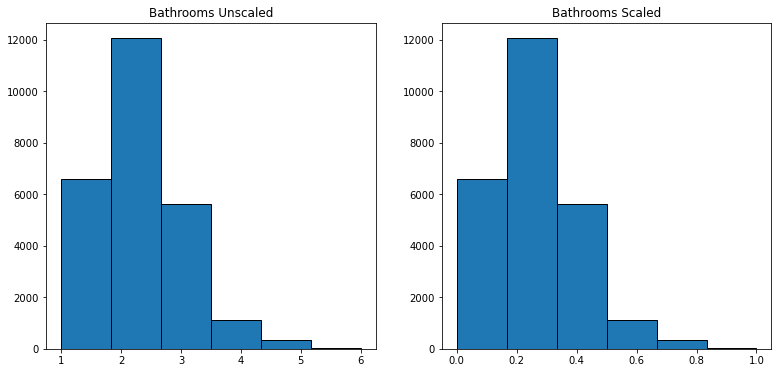

In [21]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(X_train.bathroomcnt, bins=6, ec='black')
plt.title('Bathrooms Unscaled')
plt.subplot(122)
plt.hist(X_train_scaled.bathroomcnt, bins=6, ec='black')
plt.title('Bathrooms Scaled')


Text(0.5, 1.0, 'Calculated Finished Square Feet Scaled')

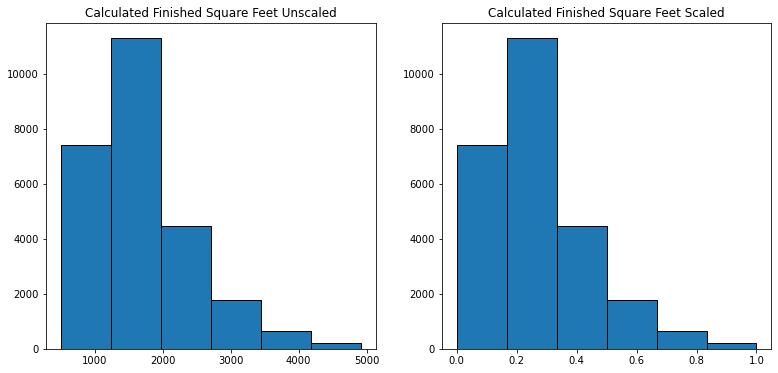

In [22]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(X_train.calculatedfinishedsquarefeet, bins=6, ec='black')
plt.title('Calculated Finished Square Feet Unscaled')
plt.subplot(122)
plt.hist(X_train_scaled.calculatedfinishedsquarefeet, bins=6, ec='black')
plt.title('Calculated Finished Square Feet Scaled')